## Path to Source

In [1]:
# load local version before pip installed version, for debugging
import os
import sys

sys.path.append(os.path.join("..", "src"))

## Imports

In [2]:
import yt
yt.toggle_interactivity()

from gallifrey.data.load import load_snapshot
from gallifrey.halo import MainHalo

Using matplotlib backend: Qt5Agg


## Load Data

In [3]:
ds = load_snapshot(127, 4096)
mw = MainHalo("MW", 4096, "09_18")

yt : [INFO     ] 2023-02-15 14:53:32,779 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-02-15 14:53:32,988 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-02-15 14:53:32,990 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-02-15 14:53:32,991 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-15 14:53:32,993 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-02-15 14:53:32,994 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-15 14:53:32,995 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-02-15 14:53:32,996 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-02-15 14:53:32,997 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-02-15 14:53:32,997 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-02-15 14:53:32,998 Parameters: hubble_constant      

## Plots

yt : [INFO     ] 2023-02-15 14:53:33,856 Allocating for 1.920e+08 particles
Loading particle index: 100%|█████████████████████████████| 245/245 [00:00<00:00, 1059.67it/s]
yt : [INFO     ] 2023-02-15 14:53:37,805 xlim = -1.694250 1.694250
yt : [INFO     ] 2023-02-15 14:53:37,810 ylim = -1.694250 1.694250
yt : [INFO     ] 2023-02-15 14:53:37,810 zlim = -50.000000 50.000000
yt : [INFO     ] 2023-02-15 14:53:37,817 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-02-15 14:53:40,776 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



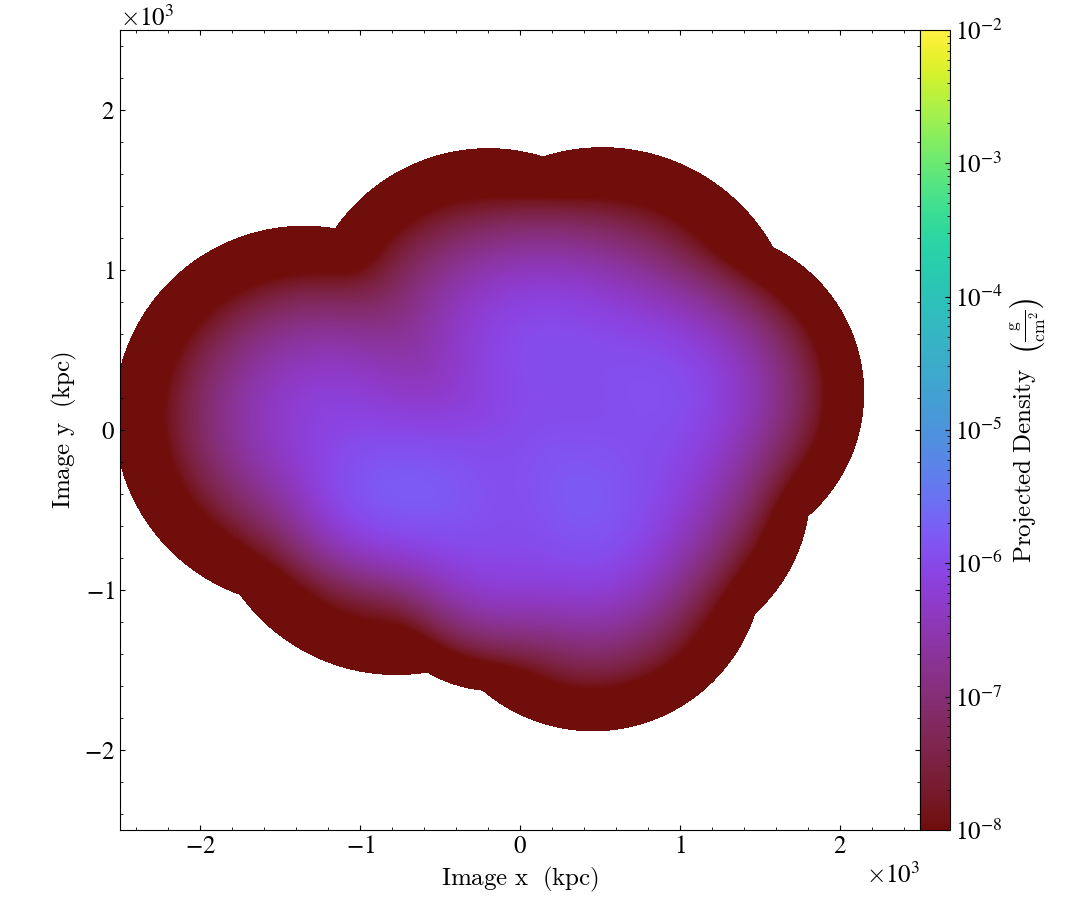
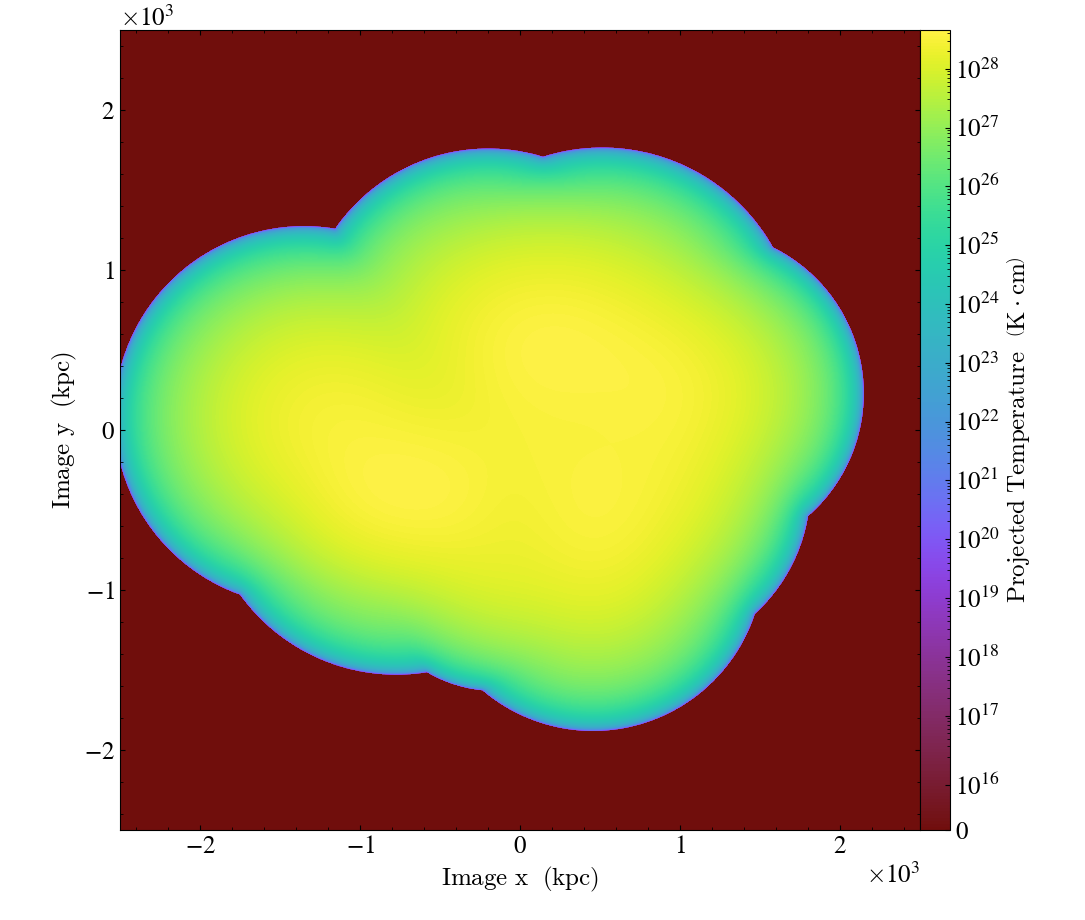

In [4]:
p = yt.ProjectionPlot(
    ds,
    normal=mw.sphere(ds).quantities.angular_momentum_vector().value,
    fields=[("gas", "density"), ("gas", "temperature")],
    data_source=mw.sphere(ds),
    center=mw.centre(ds),
    width=(5000, "kpc"),
)
p.set_zlim(("gas", "density"), zmin=(1e-8, "g/cm**2"), zmax=(1e-2, "g/cm**2"))